In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
theta = 3
alpha = 0.01
dat = []
for i in range(0,10):
    #res = alpha *2 *theta
    res = alpha * ((4 * (theta ** 2)) + (2 * theta))
    print("theta is {0:.4f} and res is {1:.4f}".format(theta,res))
    #dat.append([theta, theta**2])
    dat.append([theta, (theta**4) + (theta**2)])
    theta = theta - res

theta is 3.0000 and res is 0.4200
theta is 2.5800 and res is 0.3179
theta is 2.2621 and res is 0.2499
theta is 2.0122 and res is 0.2022
theta is 1.8100 and res is 0.1672
theta is 1.6428 and res is 0.1408
theta is 1.5020 and res is 0.1203
theta is 1.3817 and res is 0.1040
theta is 1.2777 and res is 0.0909
theta is 1.1868 and res is 0.0801


In [3]:
dat = pd.DataFrame(dat)
dat

,0,1
0,3.000000,90.000000
1,2.580000,50.964061
2,2.262144,31.304008
3,2.012209,20.443276
4,1.810006,14.009086
5,1.642761,9.981444
6,1.501959,7.344879
7,1.381685,5.553533
8,1.277689,4.297508
9,1.186835,3.392672


In [4]:
x_axis = np.linspace(0,3.5,100)

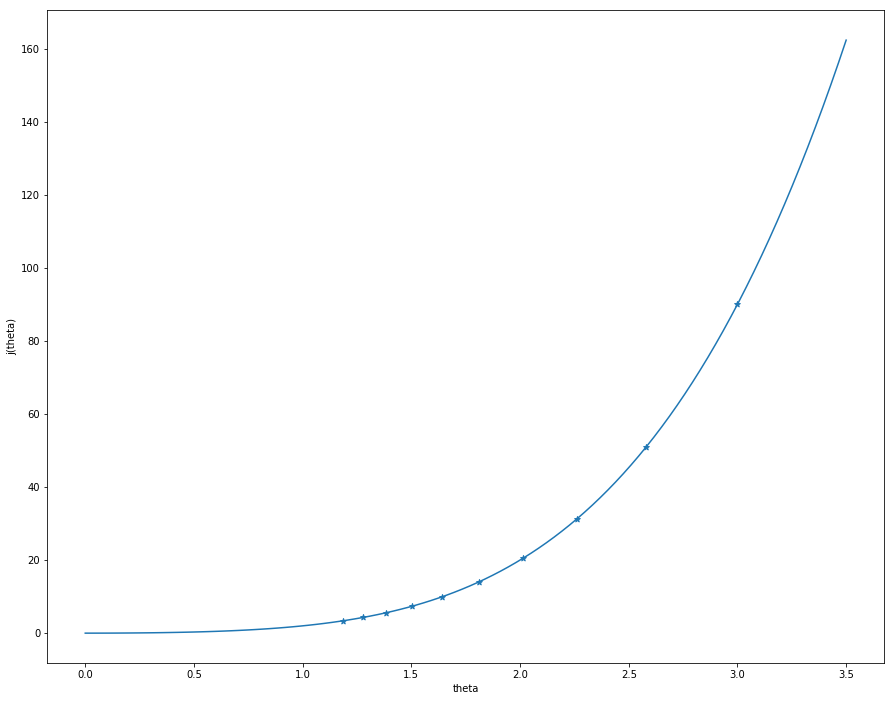

In [5]:
plt.figure(figsize=(15,12))
plt.plot(x_axis,x_axis**4+x_axis**2)
plt.scatter(dat.iloc[:,0],dat.iloc[:,1],marker='*')
plt.xlabel('theta')
plt.ylabel('j(theta)');

In [6]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X = df[['LSTAT']].values
y = boston_data.target
y.shape

(506,)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [18]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    w_[1:] += alpha * np.dot(X_std.T,errors)
    w_[0] += alpha * errors.sum()
    #print(errors)
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

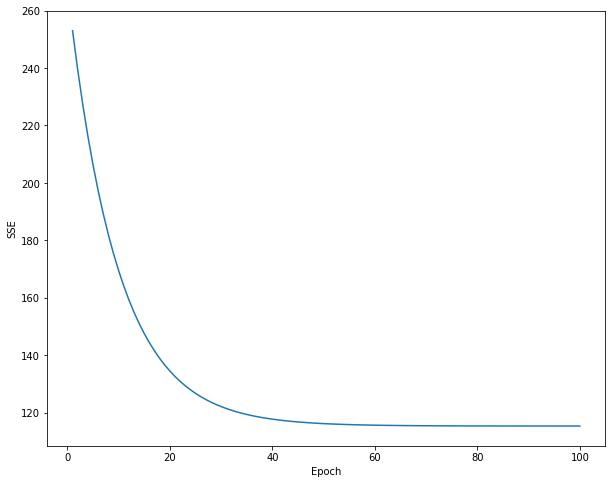

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [20]:
w_

array([-7.57793828e-16, -7.33562757e-01])